In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
weather = pd.read_csv('https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/wetter.csv')
sales = pd.read_csv('https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/umsatzdaten_gekuerzt.csv')
kiwo = pd.read_csv('https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/kiwo.csv')
weather.set_index('Datum', inplace=True)
weather.index = pd.to_datetime(weather.index)
kiwo.set_index('Datum', inplace=True)
kiwo.index = pd.to_datetime(kiwo.index)
#sales.set_index('Datum', inplace=True)
#sales.index = pd.to_datetime(sales.index)

In [4]:
weather['Windgeschwindigkeit'].describe()

count    2601.000000
mean       11.191080
std         4.124693
min         3.000000
25%         8.000000
50%        10.000000
75%        14.000000
max        35.000000
Name: Windgeschwindigkeit, dtype: float64

In [5]:
weather.head(200)

,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
Datum,,,,
2012-01-01,8.0,9.8250,14,58.0
2012-01-02,7.0,7.4375,12,NaN
2012-01-03,8.0,5.5375,18,63.0
2012-01-04,4.0,5.6875,19,80.0
2012-01-05,6.0,5.3000,23,80.0
...,...,...,...,...
2012-07-14,6.0,17.9125,19,25.0
2012-07-15,5.0,16.3750,16,25.0
2012-07-16,5.0,16.8750,16,80.0


In [6]:
kiwo

,KielerWoche
Datum,
2012-06-16,1
2012-06-17,1
2012-06-18,1
2012-06-19,1
2012-06-20,1
...,...
2019-06-26,1
2019-06-27,1
2019-06-28,1


<Axes: xlabel='Datum'>

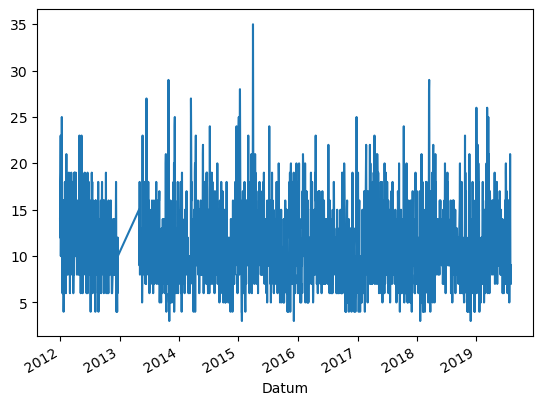

In [7]:
weather['Windgeschwindigkeit'].plot()


<Axes: >

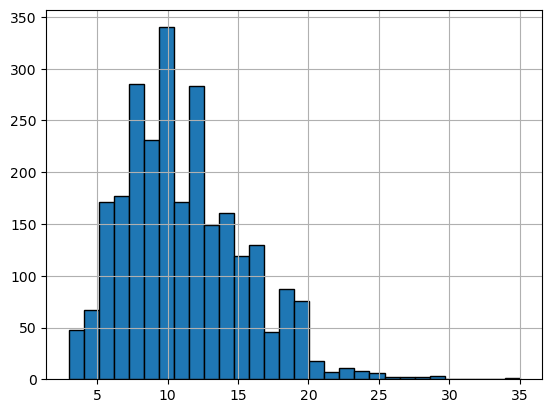

In [8]:
weather['Windgeschwindigkeit'].hist(bins=30, edgecolor='black')


<Axes: >

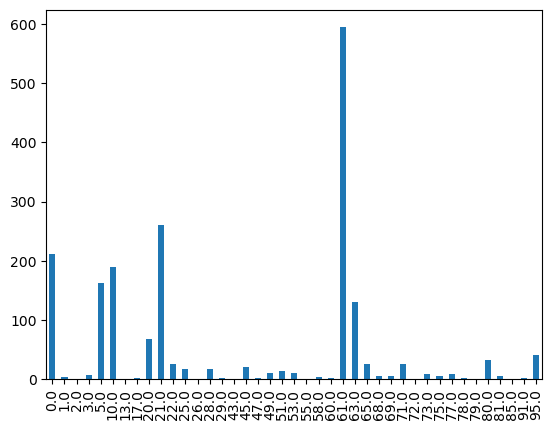

In [9]:
weather_count = weather['Wettercode'].value_counts().sort_index()
weather_count.plot(kind='bar')

In [10]:
wettercode_mapping = {
    0: "Bewölkungsentwicklung nicht beobachtet",
    1: "Bewölkung auflösend oder abnehmend",
    2: "Gleichbleibende Bewölkung",
    3: "Zunehmende Bewölkung",
    4: "Sicht durch Rauch oder Asche verringert",
    5: "Trockener Dunst",
    6: "Verbreiteter Schwebstaub",
    7: "Staub-/Sandfegen, kein Sandsturm/Staubteufel",
    8: "Staub-/Sandwirbel (Staubteufel)",
    9: "Staub-/Sandsturm in Sichtweite",
    10: "Feuchter Dunst",
    11: "Flacher Nebel in Schwaden oder Bänken",
    12: "Durchgehende flache Nebelschicht",
    13: "Wetterleuchten sichtbar, kein Donner",
    14: "Fallstreifen, kein Boden-Niederschlag",
    15: "Niederschlag in >5 km Entfernung",
    16: "Niederschlag <5 km, nicht an Station",
    17: "Gewitter hörbar, kein Niederschlag",
    18: "Markante Böen, kein Niederschlag",
    19: "Tromben/Tornados in Nähe",
    20: "Sprühregen/Schneegriesel aufgehört",
    21: "Regen aufgehört",
    22: "Schneefall aufgehört",
    23: "Schneeregen/Eiskörner aufgehört",
    24: "Gefrierender Regen aufgehört",
    25: "Regenschauer aufgehört",
    26: "Schneeschauer aufgehört",
    27: "Graupel-/Hagelschauer aufgehört",
    28: "Nebel hat sich aufgelöst",
    29: "Gewitter hat aufgehört",
    30: "Sandsturm abnehmend (leicht/mittel)",
    31: "Sandsturm gleichbleibend (leicht/mittel)",
    32: "Sandsturm zunehmend (leicht/mittel)",
    33: "Sandsturm abnehmend (stark)",
    34: "Sandsturm gleichbleibend (stark)",
    35: "Sandsturm zunehmend (stark)",
    36: "Schneefegen (leicht/mittel, unter Augenhöhe)",
    37: "Schneefegen (stark, unter Augenhöhe)",
    38: "Schneetreiben (leicht/mittel, über Augenhöhe)",
    39: "Schneetreiben (stark, über Augenhöhe)",
    40: "Nebel in Entfernung",
    41: "Nebel in Schwaden/Bänken",
    42: "Nebel, Himmel sichtbar, Nebel wird dünner",
    43: "Nebel, Himmel nicht sichtbar, Nebel wird dünner",
    44: "Nebel, Himmel sichtbar, gleichbleibend",
    45: "Nebel, Himmel nicht sichtbar, gleichbleibend",
    46: "Nebel, Himmel sichtbar, dichter werdend",
    47: "Nebel, Himmel nicht sichtbar, dichter werdend",
    48: "Nebel mit Reif, Himmel sichtbar",
    49: "Nebel mit Reif, Himmel nicht sichtbar",
    50: "Leichter unterbrochener Sprühregen",
    51: "Leichter durchgehender Sprühregen",
    52: "Mäßiger unterbrochener Sprühregen",
    53: "Mäßiger durchgehender Sprühregen",
    54: "Starker unterbrochener Sprühregen",
    55: "Starker durchgehender Sprühregen",
    56: "Leichter gefrierender Sprühregen",
    57: "Mäßiger/starker gefrierender Sprühregen",
    58: "Leichter Sprühregen mit Regen",
    59: "Starker Sprühregen mit Regen",
    60: "Leichter unterbrochener Regen",
    61: "Leichter durchgehender Regen",
    62: "Mäßiger unterbrochener Regen",
    63: "Mäßiger durchgehender Regen",
    64: "Starker unterbrochener Regen",
    65: "Starker durchgehender Regen",
    66: "Leichter gefrierender Regen",
    67: "Mäßiger/starker gefrierender Regen",
    68: "Leichter Schneeregen",
    69: "Mäßiger/starker Schneeregen",
    70: "Leichter unterbrochener Schneefall",
    71: "Leichter durchgehender Schneefall",
    72: "Mäßiger unterbrochener Schneefall",
    73: "Mäßiger durchgehender Schneefall",
    74: "Starker unterbrochener Schneefall",
    75: "Starker durchgehender Schneefall",
    76: "Eisnadeln (Polarschnee)",
    77: "Schneegriesel",
    78: "Schneekristalle",
    79: "Eiskörner",
    80: "Leichter Regenschauer",
    81: "Mäßiger/starker Regenschauer",
    82: "Sehr heftiger Regenschauer",
    83: "Leichter Schneeregenschauer",
    84: "Mäßiger/starker Schneeregenschauer",
    85: "Leichter Schneeschauer",
    86: "Mäßiger/starker Schneeschauer",
    87: "Leichter Graupelschauer",
    88: "Mäßiger/starker Graupelschauer",
    89: "Leichter Hagelschauer",
    90: "Mäßiger/starker Hagelschauer",
    91: "Gewitter mit leichtem Regen (letzte Stunde)",
    92: "Gewitter mit mäßigem/starkem Regen (letzte Stunde)",
    93: "Gewitter mit leichtem Schnee/Graupel/Hagel (letzte Stunde)",
    94: "Gewitter mit starkem Schnee/Graupel/Hagel (letzte Stunde)",
    95: "Leichtes/mäßiges Gewitter mit Regen oder Schnee",
    96: "Leichtes/mäßiges Gewitter mit Graupel/Hagel",
    97: "Starkes Gewitter mit Regen oder Schnee",
    98: "Starkes Gewitter mit Sandsturm",
    99: "Starkes Gewitter mit Graupel oder Hagel"
}

In [11]:
weather[weather['Windgeschwindigkeit'] > 20]

,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
Datum,,,,
2012-01-05,6.0,5.3000,23,80.0
2012-01-12,7.0,7.4375,25,61.0
2012-02-09,6.0,-1.6625,21,3.0
2012-04-29,7.0,11.4625,23,NaN
2012-05-12,5.0,9.3875,23,80.0
2013-05-22,7.0,9.0625,23,63.0
2013-06-15,6.0,17.0875,27,61.0
2013-10-12,8.0,13.0250,21,63.0
2013-10-28,7.0,14.3625,29,63.0


<Axes: >

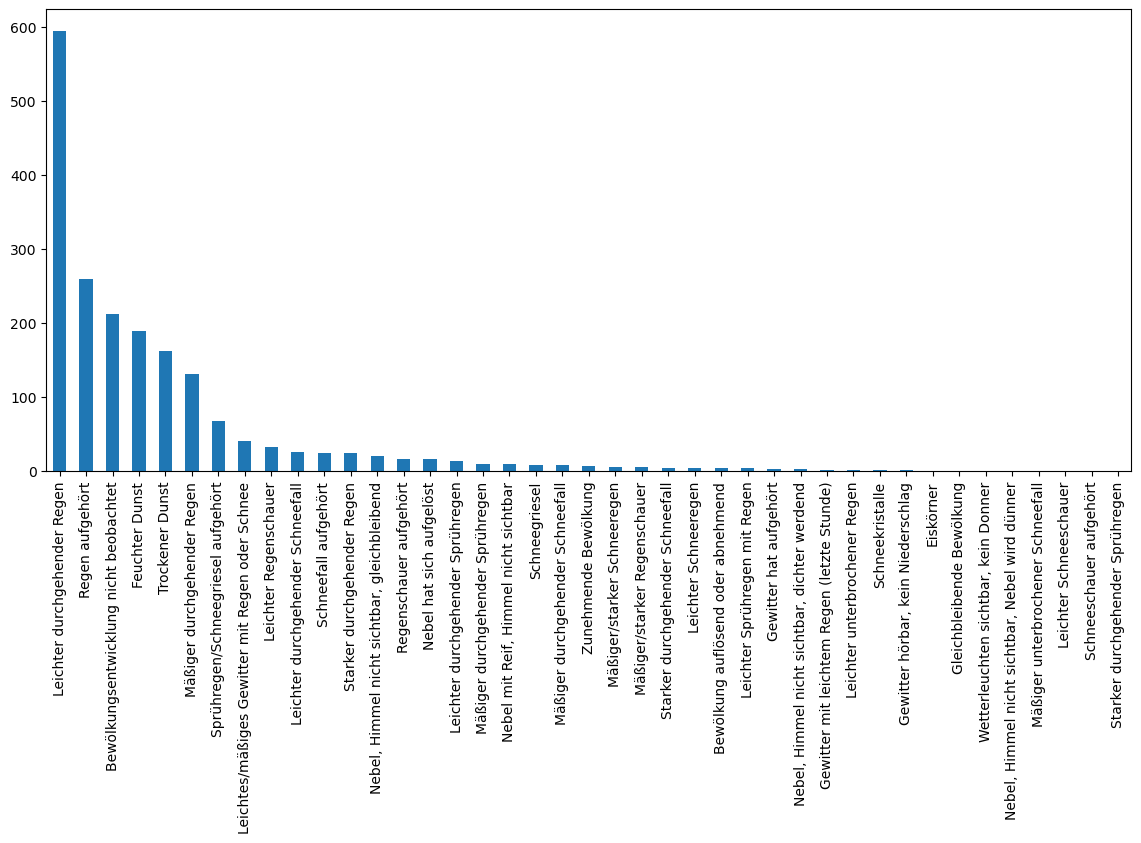

In [12]:
weather_mapped = weather['Wettercode'].map(wettercode_mapping)
weather_counts = weather_mapped.value_counts()
weather_counts.plot(kind='bar', figsize=(14, 6))



In [13]:
def gruppiere_wetter(code):
    if pd.isna(code):
        return "Sonstiges"
    try:
        code = int(code)
    except:
        return "Sonstiges"

    if code in range(50, 69):  # Sprühregen, Regen, gefrierender Regen, Schneeregen
        return "Regen"
    if code in range(20, 29):  # Sprühregen, Regen, gefrierender Regen, Schneeregen
        return "Nach Regen"
    elif code in range(80, 85):  # Regenschauer, Schneeregenschauer
        return "Schauer und Gewitter"
    elif code in range(85, 91):  # Schneeschauer, Graupel-/Hagelschauer
        return "Schnee und Eis"
    elif code in range(91, 100):  # Gewitter
        return "Schauer und Gewitter"
    elif code in list(range(10, 13)) + list(range(40, 50)):  # Dunst, Nebel
        return "Nebel"
    elif code in range(70, 80):  # durchgehender Schneefall, Eisnadeln, Schneegriesel etc.
        return "Schnee und Eis"
    elif code in range(66, 69):  # Schneeregen
        return "Schnee und Eis"
    elif code in range(76, 80):  # Eisnadeln, Schneegriesel, Eiskörner
        return "Schnee und Eis"
    else:
        return "Sonstiges"

In [14]:
def temperatur_klasse(temp):
    if pd.isna(temp):
        return "Unbekannt_temp"
    elif temp < 5:
        return "kalt"
    elif temp < 15:
        return "kühl"
    elif temp < 25:
        return "mild"
    else:
        return "warm"

In [15]:
def bewoelkung_klasse(value):
    if pd.isna(value):
        return "Unbekannt_wolke"
    elif value <= 2:
        return "sonnig"
    elif value <= 5:
        return "wolkig"
    else:
        return "bedeckt"

In [16]:
def windklasse(wind):
    if pd.isna(wind):
        return "Unbekannt_wind"
    elif wind < 10:
        return "brise"
    elif wind < 20:
        return "wind"
    else:
        return "sturm"

In [17]:
weather_group = weather['Wettercode'].apply(gruppiere_wetter)
weather_group

Datum
2012-01-01                   Regen
2012-01-02               Sonstiges
2012-01-03                   Regen
2012-01-04    Schauer und Gewitter
2012-01-05    Schauer und Gewitter
                      ...         
2019-07-28               Sonstiges
2019-07-29                   Regen
2019-07-30                   Regen
2019-07-31                   Regen
2019-08-01                   Regen
Name: Wettercode, Length: 2601, dtype: object

<Axes: >

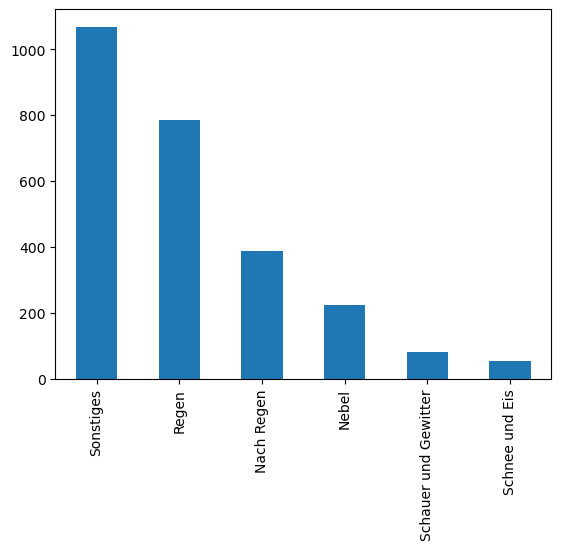

In [18]:
weather_group.value_counts().plot(kind='bar')

In [19]:
temp_class = weather['Temperatur'].apply(temperatur_klasse)
bew_class = weather['Bewoelkung'].apply(bewoelkung_klasse)
wind_class = weather['Windgeschwindigkeit'].apply(windklasse)
wett_class = weather['Wettercode'].apply(gruppiere_wetter)

weather_cat_input = pd.DataFrame({
    'Temperaturklasse': temp_class,
    'Bewoelkungsklasse': bew_class,
    'Windklasse': wind_class,
    'Wettergruppe': wett_class
}, index=weather.index)

weather_cat = pd.get_dummies(
    weather_cat_input,
    prefix=['temp', 'bew', 'wind', 'wett'],
    dtype=int
)

In [20]:
weather_cat

,temp_kalt,temp_kühl,temp_mild,temp_warm,bew_Unbekannt_wolke,bew_bedeckt,bew_sonnig,bew_wolkig,wind_brise,wind_sturm,wind_wind,wett_Nach Regen,wett_Nebel,wett_Regen,wett_Schauer und Gewitter,wett_Schnee und Eis,wett_Sonstiges
Datum,,,,,,,,,,,,,,,,,
2012-01-01,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2012-01-02,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2012-01-03,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2012-01-04,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2012-01-05,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-28,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2019-07-29,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
2019-07-30,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [21]:
sales

,id,Datum,Warengruppe,Umsatz
0,1307011,2013-07-01,1,148.828353
1,1307021,2013-07-02,1,159.793757
2,1307031,2013-07-03,1,111.885594
3,1307041,2013-07-04,1,168.864941
4,1307051,2013-07-05,1,171.280754
...,...,...,...,...
9329,1712216,2017-12-21,6,87.471228
9330,1712226,2017-12-22,6,71.911652
9331,1712236,2017-12-23,6,84.062223
9332,1712246,2017-12-24,6,60.981969


In [22]:
sales_pivot = sales.pivot(index='Datum', columns='Warengruppe', values='Umsatz').fillna(0)
sales_pivot.index = pd.to_datetime(sales_pivot.index)
sales_pivot['Total'] = sales_pivot.sum(axis=1)
pd.set_option('display.max_rows', 200) 
sales_pivot.head(200)

Warengruppe,1,2,3,4,5,6,Total
Datum,,,,,,,
2013-07-01,148.828353,535.856285,201.198426,65.890169,317.475875,0.000000,1269.249107
2013-07-02,159.793757,546.780787,265.261254,74.543917,383.628682,0.000000,1430.008397
2013-07-03,111.885594,427.343259,210.260241,69.262728,305.523072,0.000000,1124.274894
2013-07-04,168.864941,454.859641,190.686641,61.490175,308.408168,0.000000,1184.309567
2013-07-05,171.280754,492.818804,181.644870,86.759861,355.518770,0.000000,1288.023060
2013-07-06,174.552360,631.906068,291.557960,80.646577,361.866933,0.000000,1540.529898
2013-07-07,92.637755,695.255730,279.665939,94.603902,370.209601,0.000000,1532.372927
2013-07-08,135.500244,538.529250,195.158794,49.500024,285.233382,0.000000,1203.921695
2013-07-09,136.048383,585.957265,245.808339,75.208998,342.089346,0.000000,1385.112329


In [23]:
weather

,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
Datum,,,,
2012-01-01,8.0,9.8250,14,58.0
2012-01-02,7.0,7.4375,12,NaN
2012-01-03,8.0,5.5375,18,63.0
2012-01-04,4.0,5.6875,19,80.0
2012-01-05,6.0,5.3000,23,80.0
...,...,...,...,...
2019-07-28,3.0,23.3500,14,5.0
2019-07-29,6.0,25.2500,7,61.0
2019-07-30,7.0,20.7375,8,61.0


In [24]:
# Einen vollständigen Tagesindex erzeugen
voller_index = pd.date_range(start=weather.index.min(), end=weather.index.max(), freq='D')

# Fehlende Tage ermitteln
fehlende_daten = voller_index.difference(weather.index)

print(f"Anzahl fehlender Tage: {len(fehlende_daten)}")
for d in fehlende_daten:
    print(d)

Anzahl fehlender Tage: 169
2012-07-24 00:00:00
2012-10-06 00:00:00
2012-10-07 00:00:00
2012-10-13 00:00:00
2012-10-14 00:00:00
2012-10-20 00:00:00
2012-10-21 00:00:00
2012-10-27 00:00:00
2012-10-28 00:00:00
2012-11-03 00:00:00
2012-11-04 00:00:00
2012-11-10 00:00:00
2012-11-11 00:00:00
2012-11-17 00:00:00
2012-11-18 00:00:00
2012-11-24 00:00:00
2012-11-25 00:00:00
2012-12-01 00:00:00
2012-12-02 00:00:00
2012-12-08 00:00:00
2012-12-09 00:00:00
2012-12-15 00:00:00
2012-12-16 00:00:00
2012-12-22 00:00:00
2012-12-23 00:00:00
2012-12-24 00:00:00
2012-12-25 00:00:00
2012-12-26 00:00:00
2012-12-27 00:00:00
2012-12-28 00:00:00
2012-12-29 00:00:00
2012-12-30 00:00:00
2012-12-31 00:00:00
2013-01-01 00:00:00
2013-01-02 00:00:00
2013-01-03 00:00:00
2013-01-04 00:00:00
2013-01-05 00:00:00
2013-01-06 00:00:00
2013-01-07 00:00:00
2013-01-08 00:00:00
2013-01-09 00:00:00
2013-01-10 00:00:00
2013-01-11 00:00:00
2013-01-12 00:00:00
2013-01-13 00:00:00
2013-01-14 00:00:00
2013-01-15 00:00:00
2013-01-16 00

In [37]:
start, end = sales_pivot.index.min(), sales_pivot.index.max()

# Wetterdaten auf denselben Zeitraum begrenzen
weather_trimmed = weather_cat.loc[start:]

comb1 = sales_pivot.join(weather_trimmed, how='right')
comb2 = comb1.join(kiwo, how='left').fillna(0)
comb2


,1,2,3,4,5,6,Total,temp_kalt,temp_kühl,temp_mild,...,wind_brise,wind_sturm,wind_wind,wett_Nach Regen,wett_Nebel,wett_Regen,wett_Schauer und Gewitter,wett_Schnee und Eis,wett_Sonstiges,KielerWoche
Datum,,,,,,,,,,,,,,,,,,,,,
2013-07-01,148.828353,535.856285,201.198426,65.890169,317.475875,0.0,1269.249107,0,0,1,...,0,0,1,1,0,0,0,0,0,0.0
2013-07-02,159.793757,546.780787,265.261254,74.543917,383.628682,0.0,1430.008397,0,0,1,...,0,0,1,0,0,0,0,0,1,0.0
2013-07-03,111.885594,427.343259,210.260241,69.262728,305.523072,0.0,1124.274894,0,0,1,...,1,0,0,0,0,1,0,0,0,0.0
2013-07-04,168.864941,454.859641,190.686641,61.490175,308.408168,0.0,1184.309567,0,0,1,...,1,0,0,1,0,0,0,0,0,0.0
2013-07-05,171.280754,492.818804,181.644870,86.759861,355.518770,0.0,1288.023060,0,0,1,...,0,0,1,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0,0,1,...,0,0,1,0,0,0,0,0,1,0.0
2019-07-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0,0,0,...,1,0,0,0,0,1,0,0,0,0.0
2019-07-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0,0,1,...,1,0,0,0,0,1,0,0,0,0.0


In [26]:
comb2.head(200)
comb2.corr()

,1,2,3,4,5,6,Total,temp_kalt,temp_kühl,temp_mild,...,wind_brise,wind_sturm,wind_wind,wett_Nach Regen,wett_Nebel,wett_Regen,wett_Schauer und Gewitter,wett_Schnee und Eis,wett_Sonstiges,KielerWoche
1,1.000000,0.249502,0.325857,-0.272670,0.301620,-0.106844,0.401284,-0.153485,-0.085720,0.188961,...,-0.050271,0.023698,0.041020,-0.009474,-0.038276,-0.063276,0.049410,-0.056557,0.094095,0.054924
2,0.249502,1.000000,0.905039,0.210573,0.508016,-0.221906,0.931749,-0.335356,-0.258135,0.460102,...,-0.056386,-0.040229,0.070617,0.012009,-0.176166,-0.068468,0.088864,-0.112195,0.171623,0.155250
3,0.325857,0.905039,1.000000,0.089613,0.430363,-0.250743,0.876264,-0.336553,-0.317949,0.513267,...,-0.039521,-0.056367,0.059872,0.011786,-0.175473,-0.092412,0.083372,-0.098951,0.191419,0.126387
4,-0.272670,0.210573,0.089613,1.000000,0.099761,-0.079859,0.243618,0.056947,0.041700,-0.063941,...,0.012416,0.002246,-0.013114,0.012341,0.000585,0.001309,-0.019372,0.011811,-0.009352,-0.032925
5,0.301620,0.508016,0.430363,0.099761,1.000000,-0.191297,0.735695,-0.087225,-0.112668,0.182663,...,-0.038101,-0.028076,0.048047,0.016957,-0.073244,-0.021435,0.019231,-0.036398,0.057270,0.062205
6,-0.106844,-0.221906,-0.250743,-0.079859,-0.191297,1.000000,-0.167316,0.175204,0.163509,-0.283970,...,0.048484,0.002748,-0.048992,-0.010097,0.131112,0.095675,-0.031253,-0.025330,-0.145241,-0.061573
Total,0.401284,0.931749,0.876264,0.243618,0.735695,-0.167316,1.000000,-0.276032,-0.236448,0.408393,...,-0.051204,-0.039811,0.065336,0.013985,-0.148266,-0.063823,0.072405,-0.100951,0.150012,0.126377
temp_kalt,-0.153485,-0.335356,-0.336553,0.056947,-0.087225,0.175204,-0.276032,1.000000,-0.406442,-0.354614,...,0.091596,0.011825,-0.095000,-0.008451,0.262769,-0.052458,-0.046214,0.317876,-0.182978,-0.075257
temp_kühl,-0.085720,-0.258135,-0.317949,0.041700,-0.112668,0.163509,-0.236448,-0.406442,1.000000,-0.646624,...,-0.064026,0.110662,0.022601,-0.025031,-0.009652,0.225355,-0.068951,-0.129198,-0.133553,-0.101408
temp_mild,0.188961,0.460102,0.513267,-0.063941,0.182663,-0.283970,0.408393,-0.354614,-0.646624,1.000000,...,-0.020961,-0.111059,0.061650,0.047384,-0.180451,-0.150539,0.097231,-0.112723,0.224044,0.160586


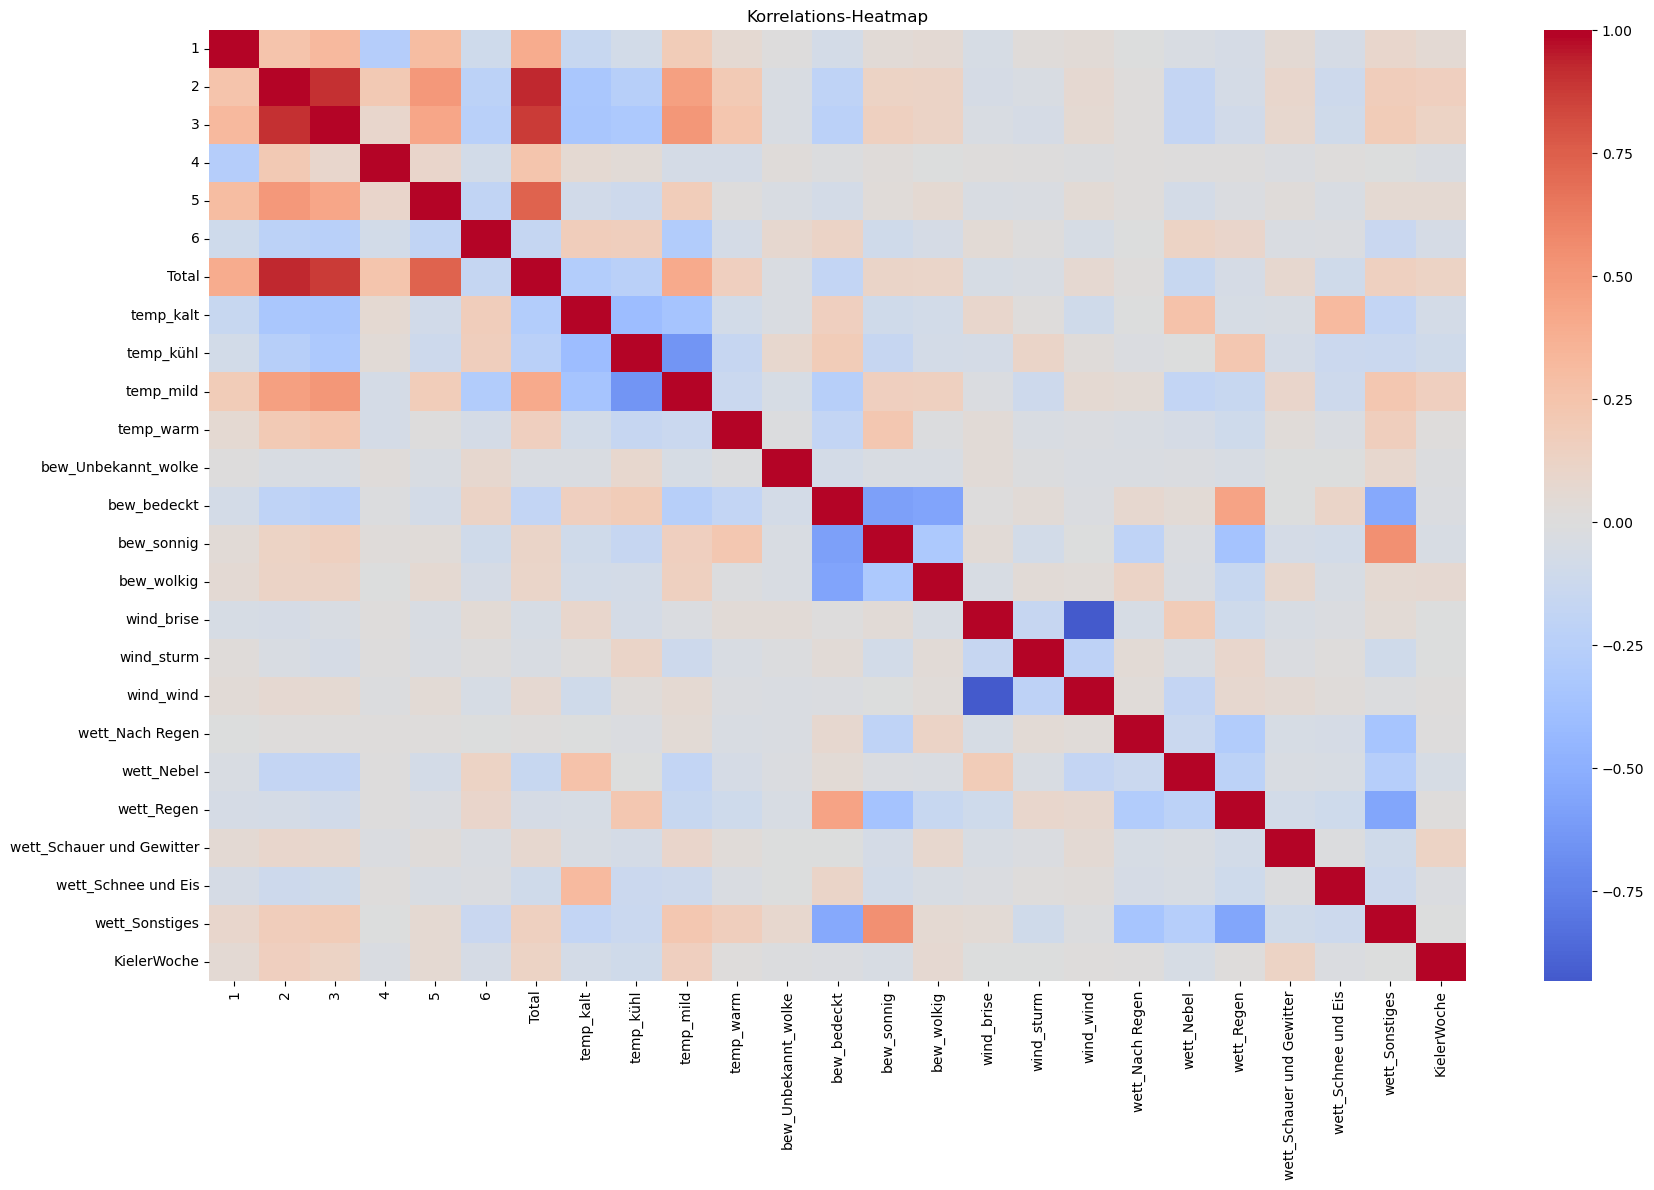

In [27]:
plt.figure(figsize=(18, 12))  # ggf. Größe anpassen
sns.heatmap(comb2.corr(), cmap='coolwarm', center=0, annot=False, fmt=".2f")
plt.title("Korrelations-Heatmap")
plt.tight_layout()
plt.show()

In [80]:
dataset = comb2

dataset=dataset.rename(columns={1: "WG1"})

train_end_date = '2017-07-31'
validation_end_date = '2018-07-31'


train_data = dataset[dataset.index<=train_end_date]
vali_data = dataset[(dataset.index> train_end_date) & (dataset.index<=validation_end_date)]
test_data = dataset[(dataset.index> validation_end_date)]



In [82]:
import pandas as pd
import statsmodels.formula.api as smf

# Fit the linear regression model
model = smf.ols('WG1 ~ temp_mild + wind_wind', data=train_data).fit()

# Modellzusammenfassung ausgeben
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    WG1   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     30.14
Date:                Thu, 22 May 2025   Prob (F-statistic):           1.48e-13
Time:                        17:45:28   Log-Likelihood:                -7688.4
No. Observations:                1491   AIC:                         1.538e+04
Df Residuals:                    1488   BIC:                         1.540e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    112.3374      1.804     62.267      0.0

In [90]:
pred = model.predict(test_data)
pred

Datum
2018-08-01    130.645073
2018-08-02    113.006723
2018-08-03    113.006723
2018-08-04    113.006723
2018-08-05    130.645073
                 ...    
2019-07-28    130.645073
2019-07-29    112.337375
2019-07-30    129.975725
2019-07-31    129.975725
2019-08-01    129.975725
Length: 353, dtype: float64

In [91]:
pred = pred.reset_index()
pred['Datum'] = pd.to_datetime(pred['Datum'])

# Format 'Datum' to 'YYMMDD01'
pred['id'] = pred['Datum'].dt.strftime('%y%m%d') + '01'

# Rename value column to 'Umsatz' (assuming it's the second column)
pred = pred.rename(columns={pred.columns[1]: 'Umsatz'})

# Select only needed columns in the right order
pred = pred[['id', 'Umsatz']]

# Save to CSV without index and with correct header
pred.to_csv('zeitreihe_formatiert.csv', index=False)

In [58]:
import pandas as pd
import statsmodels.formula.api as smf
# Load the dataset
url = "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/house_pricing_data/house_pricing_train.csv"
house_pricing = pd.read_csv(url)
# Fit the linear model
mod = smf.ols('price ~ sqft_lot15 + C(condition)', data=house_pricing).fit()
# Print the summary
print(mod.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     49.39
Date:                Thu, 22 May 2025   Prob (F-statistic):           5.82e-51
Time:                        17:24:16   Log-Likelihood:            -2.4603e+05
No. Observations:               17290   AIC:                         4.921e+05
Df Residuals:                   17284   BIC:                         4.921e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.261e+05   7.05e+0

In [81]:
dataset


,WG1,2,3,4,5,6,Total,temp_kalt,temp_kühl,temp_mild,...,wind_brise,wind_sturm,wind_wind,wett_Nach Regen,wett_Nebel,wett_Regen,wett_Schauer und Gewitter,wett_Schnee und Eis,wett_Sonstiges,KielerWoche
Datum,,,,,,,,,,,,,,,,,,,,,
2013-07-01,148.828353,535.856285,201.198426,65.890169,317.475875,0.0,1269.249107,0,0,1,...,0,0,1,1,0,0,0,0,0,0.0
2013-07-02,159.793757,546.780787,265.261254,74.543917,383.628682,0.0,1430.008397,0,0,1,...,0,0,1,0,0,0,0,0,1,0.0
2013-07-03,111.885594,427.343259,210.260241,69.262728,305.523072,0.0,1124.274894,0,0,1,...,1,0,0,0,0,1,0,0,0,0.0
2013-07-04,168.864941,454.859641,190.686641,61.490175,308.408168,0.0,1184.309567,0,0,1,...,1,0,0,1,0,0,0,0,0,0.0
2013-07-05,171.280754,492.818804,181.644870,86.759861,355.518770,0.0,1288.023060,0,0,1,...,0,0,1,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0,0,1,...,0,0,1,0,0,0,0,0,1,0.0
2019-07-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0,0,0,...,1,0,0,0,0,1,0,0,0,0.0
2019-07-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0,0,1,...,1,0,0,0,0,1,0,0,0,0.0
